# Table Of Contents:

### Objective Of The Project
- <font color=blue>The dataset contains several parameters which are considered important during the application for Masters Programs. The students who have appeared for GRE exam need to know their chance of admission to a university based on those parameters.</font>

- <font color=blue>Let's ask them first their all the GRE related score details and try to answer accordingly.</font>


### Impact Of The Project :
- <font color=blue>GRE Exams happen once a year. Preparation for any competative Exam like GRE demands a lot like - Hard work, Time, Money, Planning, Building network with like-minded people and many more.
- Once the results are declared it becomes crucial to know what is the chance that a student will get into the University he/she has aimed for.</font>
- <font color=blue>So, if we can predict their chances of getting admission it saves lot of effort wrt Time, Money, Planning.</font>
- <font color=blue>And moreover, this has a greater may impact on a student's current planning for both academics and career-wise.</font>


### Technical Aspect
#### The project is divided into major 6 parts:
- <font color=blue>Data Quality Check or inspection of the data.</font>
- <font color=blue>Descriptive statitics or summary statistics.</font>
- <font color=blue>Exploratory Data Analysis.</font>
- <font color=blue>Data Pre-processing.</font>
- <font color=blue>Model Building.</font>
- <font color=blue>Model Evaluation.</font>
- <font color=blue>Conclusion.</font>

### Data Collection Platform
- https://www.kaggle.com/datasets

### Metadata:
- <font color=blue>Student's serial number</font>
- <font color=blue>GRE Scores ( out of 340 )</font>
- <font color=blue>TOEFL Scores ( out of 120 )</font>
- <font color=blue>University Rating ( out of 5 )</font>
- <font color=blue>Statement of Purpose ( out of 5 )</font>
- <font color=blue>Letter of Recommendation Strength ( out of 5 )</font>
- <font color=blue>CGPA ( out of 10 )</font>
- <font color=blue>Research Experience ( either 0 or 1 )</font>
- <font color=blue>Chance of Admit ( ranging from 0 to 1 )</font>

### Challenges Faced
#### Technical:
- <font color=blue>Handling missing values.</font>
- <font color=blue>Less amount of training data.</font>

### Import all the necessary packages:

In [16]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model  import LinearRegression, Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data read and inspection:

In [2]:
#read and store the data into a dataframe:
data =pd.read_csv(r'C:\Users\91842\Downloads\Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314,103.0,2.0,2.0,3.0,8.21,0,0.65


Observation: 
- 'Chance of Admit' is the target/dependent column. 
- It seems we have one ordinal data present, i.e 'University Rating'. And one nominal data, i.e 'Research'. Need to check the data type.
- The column 'Serial No' is students serial numbers, this adds no information/variation to the data. Hence it can be excluded in further steps.

In [79]:
#check the shape of the data:
data.shape

(400, 9)

Observation: There are total 400 rows and 9 columns present in the data(including target column).

In [80]:
#check the data types of the columns:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Observation:
- 'University Rating' data type is showing as float64, but it is an ordinal data.

### Summary Statistics:

In [81]:
#describe the numerical columns:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,386.000000,373.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.378238,3.080429,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.084850,1.147212,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Observations:
- For all the independent columns it seems that the mean and meadian are almost the same. So we can expect that not much skewed data is present here. 
- 'GRE Score' has the highest deviation from it's mean value. Though it is not very high.
- 'TOEFL Score' has the 3nd highest devaition among all the dependent columns. Again the deviation is not very high. 
- Hence, if there is no major abnormal observation (major outlier) present in the data then mean can be a reasonable estimator incase of missing value imputation.

In [82]:
data.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score          14
University Rating    27
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

Observations:
- There are some missing values present in the column 'TOEFL Score' and 'University Rating'. So need to take care of the missing vlaues before we proceed further.
- Here to impute the missing University Ratings the the most frequently occuring first rating has been considered. 
- To impute the 'TOEFL Score' missing value the average TOEFL Score has been considered.

### Data cleaning:

In [3]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].median())

In [84]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.378238,3.075000,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,5.977145,1.107901,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,111.250000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


- After imputation there is not much change the data statistics, hence the imputation technique followed can be considered as a good one.
- Now that the data looks good let's drop the 'Serial No.' column from data and make it more clean.

In [4]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314,103.0,2.0,2.0,3.0,8.21,0,0.65


### EDA: few of the questions to be answered in this section
- Which are the top 3 most influencing features with respect to Chance Of Adimission?
- Which has the lowest influence on Chance Of Adimission?
- The students who have appeared for GRE, do they all belong to similar merit scale or different? If different then on what factor they differ? 
- Students with prior research background have more chance than who does not have the same?
- How TOEFL Score can impact GRE Score?
- Does CGPA impacts both GRE Score as well as TOEFL Score?

#### Step1 Univariate Analysis
- Let's visualize the data distrbution for each column

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

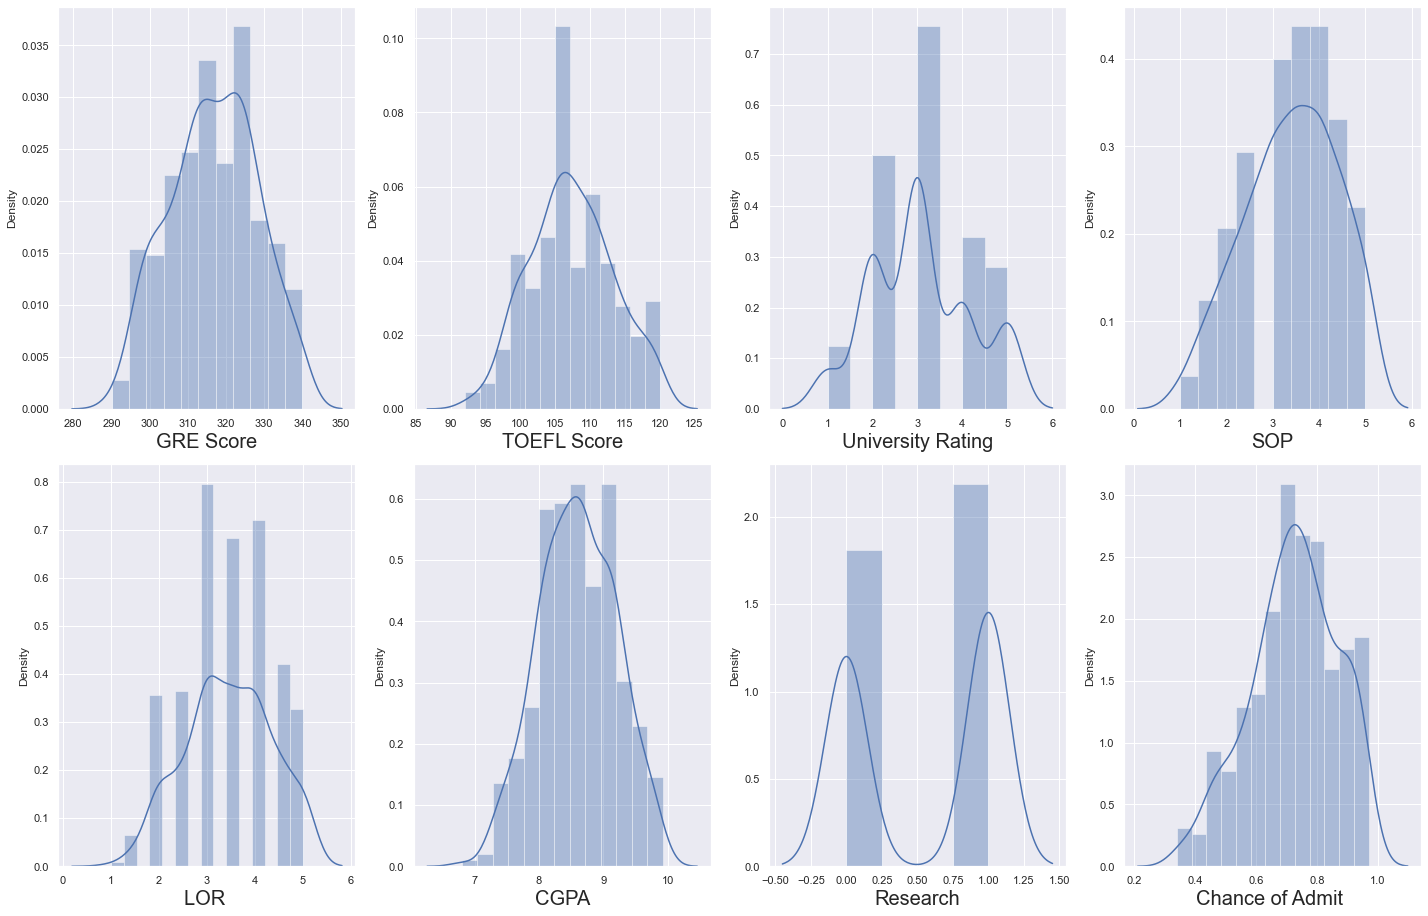

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout();

Observations:
- The data distribution looks decent enough and there doesn't seem to be high skewness in the data.
- Most of the students are scoring between 310 to 315 for GRE. Very few students are there with score less than 300.
- Most of the students are scoring between 105 to 110 for TOEFL. Very few students are there with score less than 95.
- Most of the Universities have received rating 3.
- Students with Research experience appeared more for GRE exams than the students with no research experience. 

#### Step2 Bivariate Analysis:
- Let's observe the relationship between independent variables and the dependent variable

In [7]:
y = data['Chance of Admit ']
X = data.drop(columns = ['Chance of Admit '])

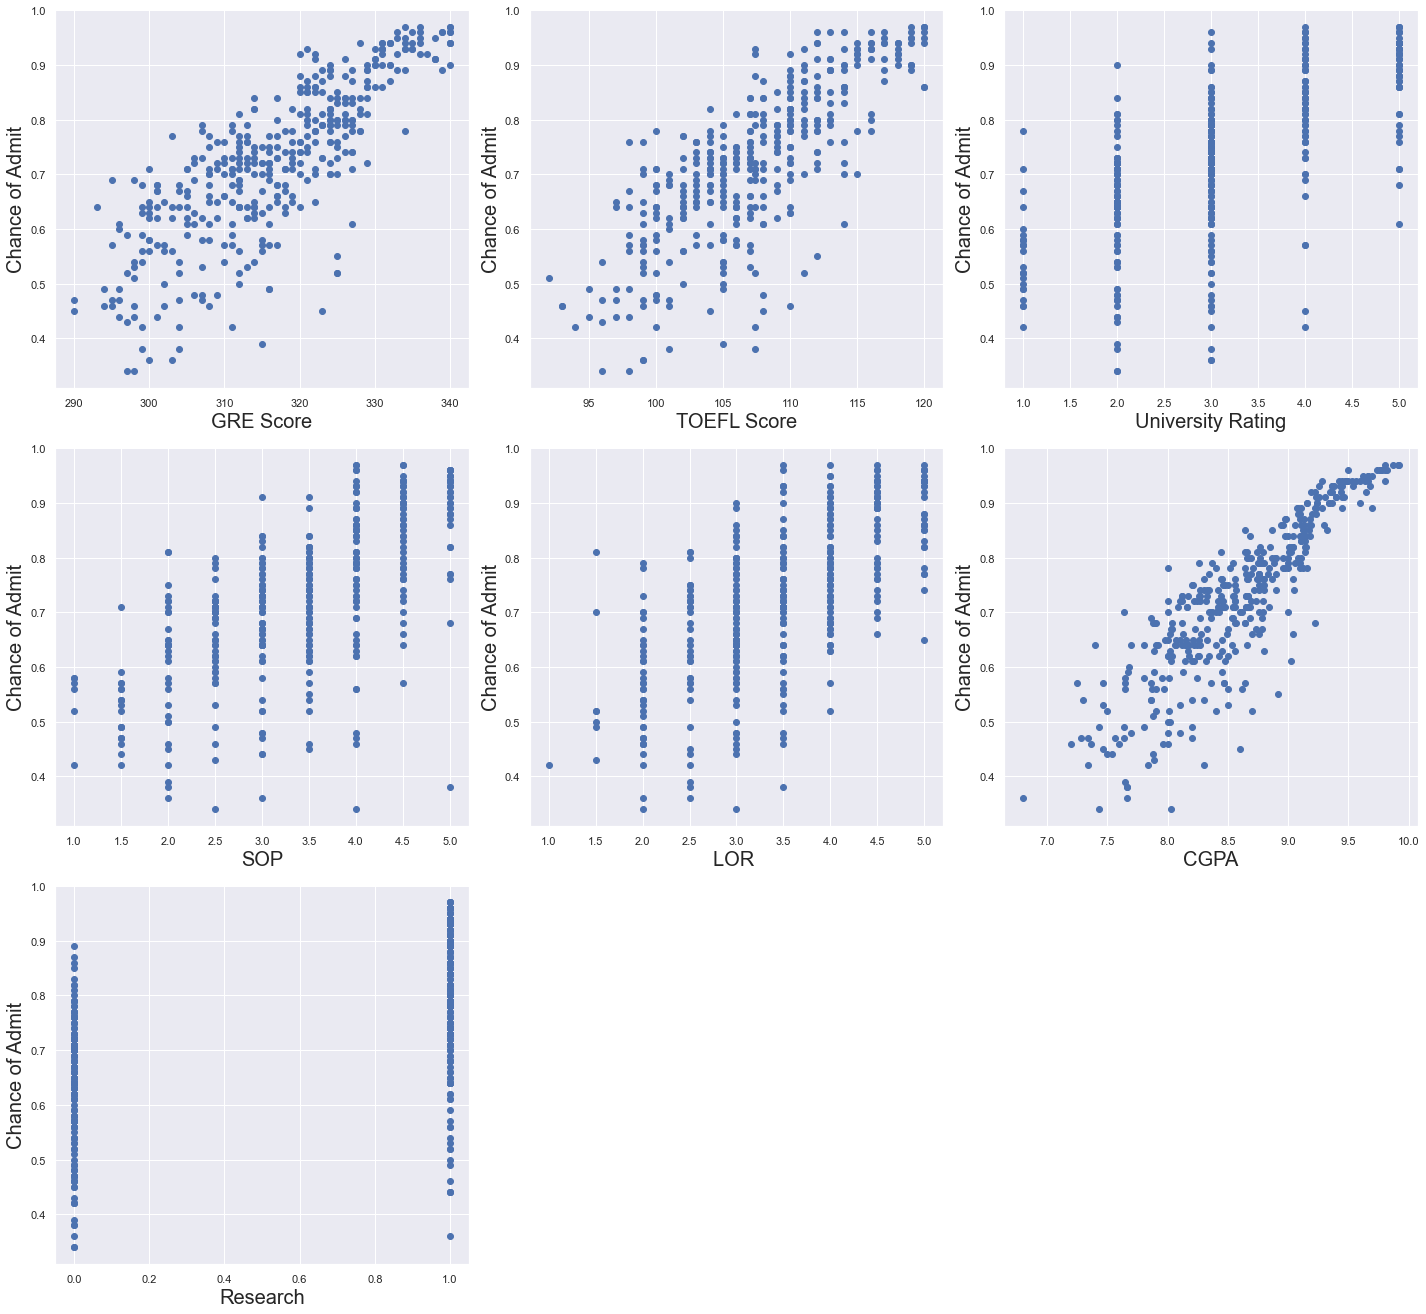

In [88]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation:
- The relationship between GRE score, TOEFL score, CGPA and Chance of Admit looks fairly linear.
- Thus, our linearity assumption is satisfied.

- Let's check for multicollinearity among the independent columns (Considering both heatmap and VIF)

<AxesSubplot:>

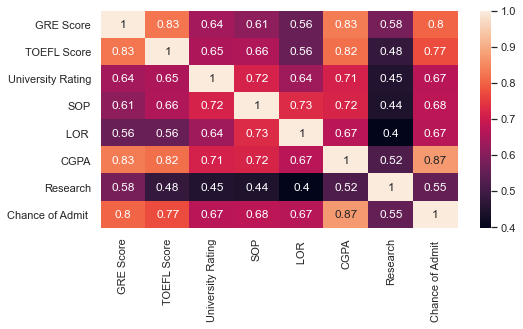

In [89]:
fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(data.corr(),annot=True)

Observation:
- It seems that TOEFL Score and GRE Score has high positive correlation (0.83).
- It seems that TOEFL Score and CGPA has high positive correlation (0.82).
- 'Chance of Admit' has high positive correlation with CGPA (0.87).

VIF Check:

In [168]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# Excluded categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [171]:
vif

,VIF,Features
0,4.705268,GRE Score
1,4.098375,TOEFL Score
2,2.686788,University Rating
3,3.169959,SOP
4,2.531779,LOR
5,6.673602,CGPA
6,1.610980,Research
7,1900.010226,Chance of Admit_log
8,657.808673,Chance of Admit_rev
9,378.210086,Chance of Admit_Ref


Observation:
- As a thumb rule, a VIF value greater than 5 means a severe multicollinearity. There seems to be no VIF score which is greater than 5 , so we are good to go. Hence the assumption for little or no multicollieanrite among the independent features is also being followed here.
- Linear regression can be applied now and let's see how good it fits the data.

- Is GRE Score related with TOEFL score?

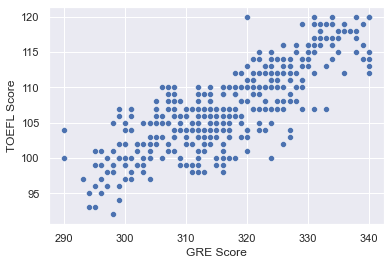

In [69]:
sns.scatterplot(x=data['GRE Score'], y=data['TOEFL Score']);

- Clearly there is a direct relation present between GRE score and TOEFL Score

- Let's check how Research is impacting the chance of admission?

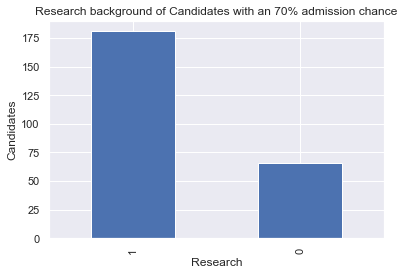

In [65]:
s = data[data["Chance of Admit "] >= 0.70]["Research"].value_counts().head(5)
plt.title("Research background of Candidates with an 70% admission chance")
s.plot(kind='bar')
plt.xlabel("Research")
plt.ylabel("Candidates")
plt.show()

Observation:
- Most of the students with higher chance of admission(70%) are having prior research background. So, high chance of admission and research are directly related. 

- Is there any relation between Research and SOP

Text(0.5, 1.0, 'Research vs SOP')

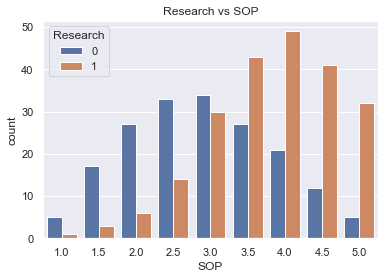

In [67]:
fig = sns.countplot(hue="Research", x='SOP', data=data)
plt.title("Research vs SOP")

Observation:
- It seems the high SOP scores (4, 4.5 and 5) are scored by students with research experience.
- So, we can say that is an applicant has research experience then he may have high SOP Score.

### Conclusion Based on EDA:
- CGPA, GRE Score and TOEFL Score are highly correlated with dependen variable. The type of the correlation is positive, hence if the student has high CGPA/high GRE Score/high TOEFL Score that there is more chance of getting admission to the university.
- It seems students with high CGPA also have high GRE Score and TOEFL Score. So, we can condlude that from GRE Exam point of view CGPA plays a pivotal role. 
- So, top 3 influential features can be CGPA, GRE Score and TOEFL Score.
- GRE score and TOEFL Score is directly related. If a student has high GRE score then he/she may has also has high TOEFL score.
- If students are having having prior research background then there is more chance of admission acceptance. 

### Model Building
- Split the data first into train and test set in a 80:20 ratio
- Train the model suing the train set
- Make the predictions using the trained model
- Model Evaluation and interprete the obtained results

In [35]:
X = data.drop(columns = ['Chance of Admit '])
y = data['Chance of Admit ']

In [36]:
#divude the entire dataset into tarin and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [37]:
print(X.shape)
print(y.shape)

(400, 7)
(400,)


In [9]:
#create an object for the model
regression = LinearRegression()

#fit the model with train data:
regression.fit(x_train,y_train)

LinearRegression()

In [38]:
#Make predictions using the trained model:
y_predictions = regression.predict(x_test)

Check how well the predictio is:
- Create a scatterplot of the actual test values versus the predicted values.
- To visualise the predictions, let's create a scatterplot between actual values (y_test) and predicted values(y_predictions).

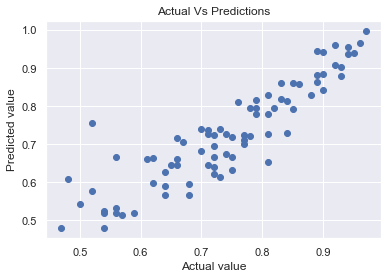

In [39]:
plt.scatter(x = y_test, y=y_predictions)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual Vs Predictions');

Observation:
- It looks like there are only few deviated predictions is done by the Model.

### Model Performance Check

In [43]:
print("R-Squared ",r2_score(y_test, y_predictions))
print("MAE",mean_absolute_error(y_test, y_predictions))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_predictions)))

R-Squared  0.779774912152978
MAE 0.045492875119894305
RMSE 0.06045218542772831


In [46]:
#Performance of the train set:
print("Train set R-Squared", regression.score(x_train, y_train))

#performance on the test set:
print("Train set R-Squared", regression.score(x_test, y_test))

Train set R-Squared 0.8021096546826598
Train set R-Squared 0.779774912152978


Observation:
- So it looks like the model R-Sqaured value is a little less on the test data.
- We can say that the model has overfitted the training data to a small extent.
- Let's apply Regularization technique to overcome this issue of overfitting.

#### Let's treat overfitting using Regularization technique:

In [47]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 5 cross validations
lasscv = LassoCV(alphas = [0.01, 0.1, 0.001, 1], cv = 5)
lasscv.fit(x_train, y_train)

LassoCV(alphas=[0.01, 0.1, 0.001, 1], cv=5)

In [48]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.001

In [49]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [50]:
lasso_reg.score(x_test, y_test)

0.7677461909963856

Observation:
- R-Squared value for test data comes almost as same as before using LASSO regularization. 
- So, it is fair to say our OLS model did not overfit the data.

In [51]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 


ridgecv = RidgeCV(alphas = [0.01, 0.1, 0.001, 1] ,cv=5)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.01 , 0.1  , 0.001, 1.   ]), cv=5)

In [52]:
ridgecv.alpha_

0.1

In [53]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [54]:
ridge_model.score(x_test, y_test)

0.7682476775140639

Observation:
- So, we can see that by applying different technique of regularization, still we are getting the same R-Squared value. That means our model has been well trained over the training data and there is no issue of overfitting.

## Conclusion:
- Almost all the parameters are correlated with the depenedent feature and the degree of the relation is staring from moderate to strong positive relation. The top 3 Significant features in my opinion are CGPA, GRE score and TOEFL score.
- Linear Regression assumptions are followed and hence, the model has performed well for this particular type of data and the given problem. 
- After trying different techniques we can conclude that the model has generalized the data well and hence the predictions made by the linear model can be reliable.